# Complex Numbers and Interference Phenomena

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Brief Review from Lab 2

**Plotting Functions**

## STOP:  Double click this text area and type your answer to the following question:

**(1)** Look at the code immediate below.  What will the code below do.  Be as specific as possible.
The function will square the input, x, and multiply it by 3.

The code will create a graph with axes (x-value, y-value). There will be 6 x values from -1 to 5. Y will be calculated using the function (the for loop calculates y at each value of x)



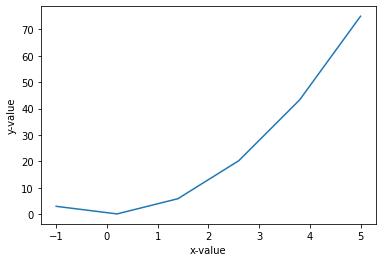

In [2]:
def plot_me(x):
    return (3 * x**2)

x_axis = np.linspace(-1,5,6)
y_axis = np.zeros(len(x_axis))
for i in range(len(x_axis)):
    y_axis[i] = plot_me(x_axis[i])
    
plt.figure()
plt.plot(x_axis,y_axis)
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.show()

In the code block below, create code that will create a graph that is:
- smooth (not jagged like the previous plot)
- a plot for x = 0 to x = 3
- plotting the function $-4.9 x^2$
- label "time" on the x-axis and "displacement" on the y-axis.

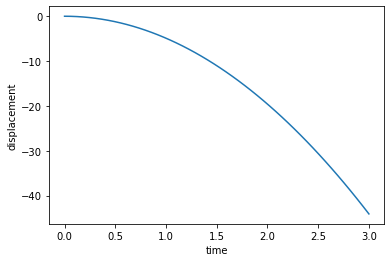

In [3]:
def smooth_plot(x):
    return (-4.9 * x**2)

t = np.linspace(0,3,50)
x = np.zeros(len(t))
for i in range(len(t)):
    x[i] = smooth_plot(t[i])
    
plt.figure()
plt.plot(t,x)
plt.xlabel("time")
plt.ylabel("displacement")
plt.show()

# Sliders and animations

We created traveling waves, and were able to use a slider to "animate" them,
$$w (x,t) = \sin (2 \pi x - \pi t)$$
Run the following code and confirm the wave travels to the right.

In [4]:
def w_right(x, t):
    return np.sin(2*np.pi*x - np.pi*t)

def plot_wave(t):
    x = np.linspace(0,2,500)
    y = np.zeros(len(x))
    
    for i in range(len(x)):
        y[i] = w_right(x[i], t)
        
    plt.figure()
    plt.plot(x, y)
    plt.show()
    
widgets.interact(plot_wave, t=(0,20,0.1))

interactive(children=(FloatSlider(value=10.0, description='t', max=20.0), Output()), _dom_classes=('widget-int…

<function __main__.plot_wave(t)>

# Complex Numbers

In Python, $i = \sqrt{-1}$ is written as ``1j``.  (It should be noted that any number can precede ``j``, but a number is necessary, otherwise, Python will treat it as a variable.  We can use it with an exponential, just like any other exponential, for example, $z = e^{i \pi}$.

In [5]:
z = np.exp(1j * np.pi)
print(z)

(-1+1.2246467991473532e-16j)


What is going on here?  We begin with Euler's formula,
$$e^{i x} = \cos x + i \sin x .$$

## STOP:  Double click this text area and type your answer to the following question:
**(2)** Using Euler's formula, what do we expect for the value for $e^{i \pi}$?  Why isn't our answer exactly that?  Check your answer with the instructor, or have a discussion if you're completely unsure.

The answer should have been -1 because cos(pi) = -1 and sin(pi) = 0. Our answer isn't exactly -1 because python attempts to calculate all sin(pi) but can get to 10E-16 because that is very, very close to zero.


Can we plot this?  Run the following code:

C:\Users\mayan\AppData\Local\Temp/ipykernel_11384/902931747.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  ce[i] = complex_exponential(phi[i])


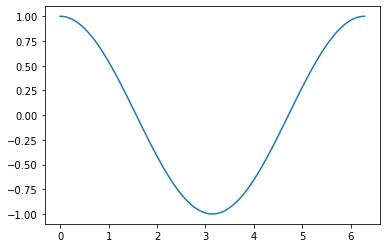

In [6]:
def complex_exponential(z):
    return np.exp(1j * z)

phi = np.linspace(0, 2*np.pi, 100)
ce = np.zeros(len(phi))

for i in range(len(phi)):
    ce[i] = complex_exponential(phi[i])
    
plt.figure()
plt.plot(phi,ce)
plt.show()

Take a moment to notice the warning.  When trying to plot complex numbers, Python only plots the real part.

There are two parts to a complex number, its real and imaginary parts.  Run the following code:

In [7]:
print(np.real(z))
print(np.imag(z))

-1.0
1.2246467991473532e-16


## STOP:  Double click this text area and type your answer to the following question:
**(3)** What does ``np.real(z)`` and ``np.imag(z)`` do?

it determines the real value of z and the imaginary value of z from Euhler's equation above



## STOP:  Double click this text area and type your answer to the following question:

**(4)** Consider the function `fun(x)` as defined below.  What does it do?  What are three possible inputs where you can predict the output?  After you answer these questions in the space below, use the empty code box to print your three predictions to test them out.

The function calculates the imaginary part of e^ix for whatver values of x we pick. It prints out cosx + isinx. 
Predictions:
(0,0)
(pi/2, 1j)
(pi/4, sin(45)j)


In [8]:
def fun(x):
    return np.imag( np.exp(1j * x) )

In [9]:
print(fun(0))
print(fun(np.pi/2))
print(fun(np.pi/4))

0.0
1.0
0.7071067811865476


We tested this function against our predictions for a few points, but how do we know that the functions are the same?  Say we have two functions:
$\displaystyle f(x) = (x + x)^2 \qquad g(x) = 4 x^2$

How do we know these functions are the same?  
- We can test a few points:  $f(0) = g(0) = 0$, $f(1) = g(1) = 4$, $f(2) = g(2) = 16$.
- But, we can also plot functions, for example, plot $f(x)$ and $g(x)$ on the same plot.
- Better yet, since it's hard to tell if the two curves are exactly the same or not, we can plot $f(x) - g(x)$, and see how close to zero it is.

0 0
4 4
16 16


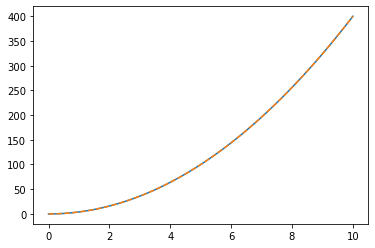

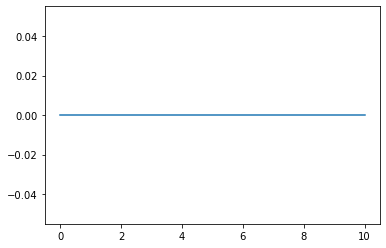

In [10]:
def f(x):
    return (x+x)**2
def g(x):
    return 4 * x**2

print(f(0), g(0))
print(f(1), g(1))
print(f(2), g(2))

x = np.linspace(0,10,100)
f_plot = np.zeros(len(x))
g_plot = np.zeros(len(x))
f_minus_g = np.zeros(len(x))
for i in range(len(x)):
    f_plot[i] = f(x[i])
    g_plot[i] = g(x[i])
    f_minus_g[i] = f(x[i]) - g(x[i])
    
plt.figure()
plt.plot(x, f_plot)
plt.plot(x, g_plot,linestyle='--')
plt.figure()
plt.plot(x, f_minus_g)
plt.show()

For ``fun(x)``, identify a real function you identified as being equivalent to ``fun``, then graph both functions on the same plot to see if the two functions are similar, then plot their difference to show that they are the same (at least to computational precision).

0.0 0.0
1.0 1.0
0.7071067811865476 0.7071067811865476


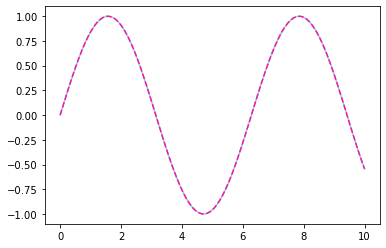

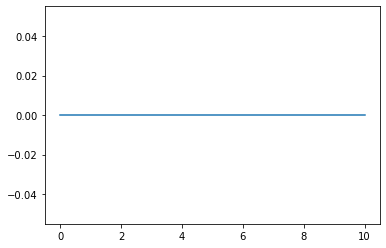

In [11]:
def sin(x):
    return(np.sin(x))

print(fun(0), sin(0))
print(fun(np.pi/2), sin(np.pi/2))
print(fun(np.pi/4), sin(np.pi/4))

x = np.linspace(0,10,100)
function = np.zeros(len(x))
sin_x = np.zeros(len(x))
f_minus_sin = np.zeros(len(x))

for i in range(len(x)):
    function[i] = fun(x[i])
    sin_x[i] = sin(x[i])
    f_minus_sin[i] = fun(x[i]) - sin(x[i])
    
plt.figure()
plt.plot(x, function,color='lightskyblue')
plt.plot(x,sin_x,color='deeppink',linestyle='--')

plt.figure()
plt.plot(x, f_minus_sin)
plt.show()

The cell below is an exact copy of the rightward moving wave above.  Change the function ``w_right(x,t)`` to be written in terms of the imaginary part of complex exponentials (and not sine).  Make sure the resulting traveling wave is correct (i.e., unchanged).

In [12]:
def w_right(x, t):
    return np.imag(np.exp(1J * (2*np.pi*x - np.pi*t)))

def plot_wave(t):
    x = np.linspace(0,2,500)
    y = np.zeros(len(x))
    
    for i in range(len(x)):
        y[i] = w_right(x[i], t)
        
    plt.figure()
    plt.plot(x, y)
    plt.show()
    
widgets.interact(plot_wave, t=(0,20,0.1))

interactive(children=(FloatSlider(value=10.0, description='t', max=20.0), Output()), _dom_classes=('widget-int…

<function __main__.plot_wave(t)>

One more useful thing is the absolute value squared of a complex number.  Consider the function below.  Plot the function from $x = 0$ to $2 \pi$.  What do you notice about the result?

In [13]:
def absolute_value_squared(x):
    return (np.abs( complex_exponential(x) ))**2

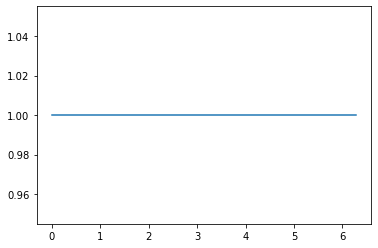

In [14]:
x = np.linspace(0,2*np.pi,100)
absolute_value = np.zeros(len(x))

for i in range(len(x)):
    absolute_value[i] = absolute_value_squared(x[i])

plt.figure()
plt.plot(x, absolute_value)
plt.show()

One can think of the absolute value squared of $e^{ix} = \cos x + i \sin x$ as the sum of the real part squared and the imaginary part squared.  Almost akin to a Pythagorean theorem.  Does your result make sense? 

# Superposition and Interference

If multiple electromagnetic waves are in the same location with the same frequency, they can add and produce interesting phenomena.

One example is standing waves, in e.g., a microwave oven.  Let's consider a microwave oven, operating with frequency 2.45 GHz, wavelength 12.2 cm, and width 30.5 cm.  Let's write the electric field as the superposition of a right-moving and left-moving wave,
$$E(x,t) = \sin(k x - \omega t) + \sin(kx + \omega t),$$
with $k = 2 \pi / \lambda = 2 \pi / 12.2$, $\omega = 2 \pi f = 2 \pi (2.45)$, which uses units of cm for position and ns for time.

In the cell below, create a slider to make an animation of the wave.  You are strongly encouraged to re-purpose the code above to do this.  In doing so, there should be the following changes:
- Of course, a new function
- Label the x-axis as "x (cm)", and the y-axis as "Electric field"
- Plot the x-values from x = 0 to x = 30.5 (make sure there's enough points to ensure a smooth graph)
- Include the statement ``plt.ylim(-2.5,2.5)`` so the y-axis doesn't change its scale as the wave evolves.
- In the slider, use the interval ``t = (0, 5, 0.01)``

In [15]:
def electric_field(x, t, k, w):
    return np.sin(k*x - x*t) + np.sin(k*x + w*t)

def plot_field(t):
    distance = np.linspace(0,30.5,500)
    field = np.zeros(len(distance))
    
    for i in range(len(distance)):
        field[i] = electric_field(distance[i], t, 2*np.pi/12.2, 2*np.pi*2.45)
        
    plt.figure()
    plt.plot(distance, field)
    plt.ylim(-2.5,2.5)
    plt.show()
    
widgets.interact(plot_field, t=(0,5,0.01))

interactive(children=(FloatSlider(value=2.0, description='t', max=5.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot_field(t)>

The intensity of the wave is proportional to the electric field squared, so create a new slider to animate
$$I (x,t) = \big[ \sin(k x - \omega t) + \sin(kx + \omega t) \big]^2,$$
Here, label the y-axis "Intensity" and choose an appropriate ``plt.ylim( , )`` statement so you can see the entirety of the result in your animation.

In [16]:
def intensity(x,k,w,t):
    return (np.sin(k*x - x*t) + np.sin(k*x + w*t))**2

def plot_intensity(t):
    distance = np.linspace(0,30.5,500)
    field_squared = np.zeros(len(distance))
    
    for i in range(len(distance)):
        field_squared[i] = intensity(distance[i], 2*np.pi/12.2, 2*np.pi*2.45, t)
        
    plt.figure()
    plt.plot(distance, field_squared)
    plt.ylim(-1,5)
    plt.ylabel("intensity")
    plt.show()
    
widgets.interact(plot_intensity, t=(0,5,0.01))

interactive(children=(FloatSlider(value=2.0, description='t', max=5.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot_intensity(t)>

Since the oscillations of the standing wave occur on time scales of nanoseconds, it can be useful to define the time-averaged intensity, really just the average of what we saw in our previous animation.  You can notice by eye that there are nodes, locations where the intensity is always zero, and anti-nodes, locations where the intensity is maximal.

To create the time-averaged intensity, it can be useful to use complex numbers to represent the wave.  Start by representing the electric field as the **imaginary part** of
$$\tilde{E} (x,t) = e^{i (kx - \omega t)} + e^{i (-kx + \pi - \omega t)}.$$
That may seem to be an awkward way to represent it, but it is mathematically useful when both parts of the superposition are proportional to $e^{-i \omega t}$.

Create a slider using this new function that involves complex exponentials to confirm that you get the same results as before.

In [17]:
def e_field(x,k,w,t):
    return np.imag(np.exp(1j*(k*x-w*t))+np.exp(1j*(-k*x+np.pi-w*t)))

def plot_e_field(t):
    x = np.linspace(0,30.5,500)
    imag_e_field = np.zeros(len(x))
    
    for i in range(len(x)):
        imag_e_field[i] = intensity(x[i], 2*np.pi/12.2, 2*np.pi*2.45,t)
        
    plt.figure()
    plt.plot(x, imag_e_field)
    plt.ylim(-1,5)
    plt.ylabel("intensity")
    plt.show()
    
widgets.interact(plot_e_field, t=(0,5,0.01))

interactive(children=(FloatSlider(value=2.0, description='t', max=5.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot_e_field(t)>

Using this result, it can be shown that the time-averaged intensity is proportional to:
$$I (x) = \tfrac{1}{2}\big\vert\, e^{i k x} + e^{i (-k x + \pi)} \,\big\vert^2$$
This is the absolute value squared of the complex number (excluding the $e^{-i \omega t}$).  Notice that the result is independent of time, so we can just make a regular plot (without the slider).  Create a plot of the time-averaged intensity.

In [18]:
def time_avg_intensity(x,k):
    return 0.5 * np.abs(np.exp(1j*k*x) + np.exp(1j*(-k*x+np.pi)))**2

def plot_avg_intensity():
    x = np.linspace(0,30.5,500)
    averaged_intensity = np.zeros(len(x))

    for i in range(len(x)):
        averaged_intensity[i] = time_avg_intensity(x[i], 2*np.pi/12.2)

    plt.figure()
    plt.plot(x, averaged_intensity)
    plt.ylim(-1,5)
    plt.ylabel("time_averaged_intensity")
    plt.show()



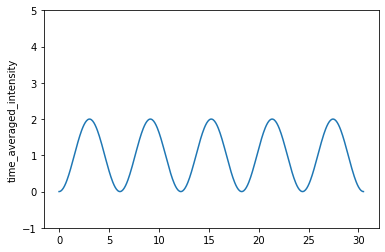

In [19]:
plot_avg_intensity()